Atividade Prática Supervisionada - Entrega 4 - Teste de Hipótese
# ***ONU - Análise de Objetivo de Desenvolvimento Sustentável***
### **Teste de Blocos Econômicos e Desenvolvimento**

Integrantes:  
* Eduardo Mendes Vaz  
* João Lucas de Moraes Barros Cadorniga  

---

## **Introdução**  

Na análise anterior do desenvolvimento mundial em relação Objetivo de Desenvolvimento Sustentável IV da ONU — o de investimento e melhoria das oportunidades educacionais —, desenvolvemos um modelo estatístico que classificou os países da **União Europeia e do Mercosul** de acordo com o fator `Investimento Governamental em Educação, como % do PIB`¹ ao longo dos anos. A **mediana** de cada país foi comparada a um fator calculado previamente².

Agora, temos o objetivo de ***testar a hipótese que países de um bloco são tipicamente mais “avançados” que os de outro bloco*** em relação ao indicador escolhido, fazendo uso da técnica de **Bootstrapping** para analisar intervalos de confiança de probabilidades.

## **Análise Estatística com Bootstrapping**

Para tal tarefa, utilizamos as probabilidades `P(avançado|bloco)` calculadas na análise anterior. São elas:

* Probabilidade de ser **Avançado** dado que é do *Mercosul*: ~73%
* Probabilidade de ser **Avançado** dado que é da *UE*: ~74%
* Probabilidade de ser **Atrasado** dado que é do *Mercosul*: ~27%
* Probabilidade de ser **Atrasado** dado que é da *UE*: ~26%

Com essas estatísticas em mão, precisamos determinar os **intervalos de confiança** para um nível previamente determinado de `0.9` e o seu **erro padrão**. Isso foi realizado pela função `stats.bootstrap`, que utilizou os seguintes parâmetros:

1. `valores`: tupla dos valores medianos de investimento (em % do GDP) cada país do bloco
2. `func`: função que é aplicada a cada novo *sample* de dados gerado pelo Bootstrapping, que devolve a probabilidade de um país daquela amostra ser avançado.
3. `confidence_level`: 90%
4. `vectorized = False`: assim considera que os dados possuem apenas um eixo e não manda para `func` o parâmetro `axis`.

Realizando um grande número de amostras, calculando a probabilidade para cada uma, a função determinou os **percentis** para o nível de confiança desejado, obtendo³:

*OBS: foi realizado o teste de Bootstrapping tanto para países avançados, quanto para atrasados de cada bloco.*

1. *Avançados*:
	* Mercosul:
		* **Intervalo**: 0.364 - 0.8181
		* **Erro Padrão**: 0.1334
	* UE:
		* **Intervalo**: 0.5185 - 0.815
		* **Erro Padrão**: 0.085

2. *Atrasados*:
	* Mercosul:
		* **Intervalo**: 0.0 - 0.455
		* **Erro Padrão**: 0.135
	* UE:
		* **Intervalo**: 0.111 - 0.370
		* **Erro Padrão**: 0.084


## **Conclusões**

Primeiro, vale levantar hipóteses sobre os intervalos obtidos. Percebemos que eles possuem **grande amplitude** (considerando que vão no máximo de 0 a 1), o que pode ser explicado pela relativa *pequena quantidade de países* por bloco, o que resulta em **pequenas amostras**. Isso, somado a probabilidade alta em cada bloco de um país ser avançado (~70%), pode também ter resultado nas barreiras inferiores dos intervalos dos países atrasados se aproximarem de 0.

Analisando o gráfico das probabilidades (plotado junto ao **erro padrão** obtido), concluímos que os dois blocos talvez **não fossem os melhores para esse tipo de comparação**. Como ambos possuíam probabilidades muito próximas, os intervalos se sobrepuseram com facilidade: ***ambos os intervalos da UE estão contidos nos do Mercosul.***

Além disso, o intervalo do Mercosul é nitidamente maior, o que pode ter sido causado por possuir menos países membros, o que limita o tamanho das amostras e causa *maior variabilidade* entre elas.

Portanto, ***não é seguro dizer que países da UE ou do Mercosul são mais “avançados” do que os do outro bloco***, considerando análises tão semelhantes entre eles. Pode-se levantar a hipótese que esse tipo de teste não seja o mais adequado para ser realizado entre blocos econômicos, já que os tamanhos da amostra são pequenos, mas não se descarta a possibilidade de que, **se realizado entre outros blocos, ele poderia retornar outros tipos de resultados**.

---
  
¹ Fonte: [World Bank](https://databank.worldbank.org/reports.aspx?source=sustainable-development-goals-%28sdgs%29#)  
² O fator de comparação é explicado na seção *observação* da parte **Classificação dos Países e Probabilidades Iniciais**  
³ Cálculos completos abaixo no PDF

***Observação***: Gráfico de distribuição disponível no **final do PDF**

# **Classificação dos Países & Probabilidades Iniciais**

In [46]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv('dados/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4)

#OBS: Venezuela está suspensa do Mercosur, portanto, não foi incluída no cálculo
mercosul = df[df['Country Name'].isin(['Uruguay', 'Argentina', 'Paraguay', 'Brazil', 'Bolivia', 'Chile', 'Peru', 'Colombia', 'Ecuador', 'Guyana', 'Suriname'])]
eu = df[df['Country Name'].isin(['Austria', 'Belgium', 'Bulgaria', 'Denmark', 'Finland', 'Germany', 'France', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Cyprus', 'Croatia', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Slovakia', 'Slovenia'])]


# Fator foi calculado pela mediana da % do PIB investido em educação nos anos analisados na APS1 (2004 a 2018), e então
# calculada a média com todos os anos. O fator foi aplicado para que os valores de cada país fossem comparáveis.
# Acima do fator, o país é considerado avançado em relação a ODS, e, abaixo, é considerado atrasado.
fatorx = df[[str(i) for i in range(2004, 2019)]].median().mean() # ~ 4.15



# cria coluna chamada Avançado no dataframe mercosul com True se a mediana dos anos 2004 a 2018 for maior que fatorx
mercosul['Avançado'] = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx

# cria coluna chamada Avançado no dataframe eu com True se a mediana dos anos 2004 a 2018 for maior que fatorx
eu['Avançado'] = eu[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx


# Probabilidades Condicionais
p_avancado_dado_mercosul = len(mercosul[mercosul['Avançado'] == True])/len(mercosul)
p_avancado_dado_eu = len(eu[eu['Avançado'] == True])/len(eu)
print(f'Probabilidade de país ser avançado, dado que faz parte do Mercosul: {p_avancado_dado_mercosul * 100 :.2f}%')
print(f'Probabilidade de país ser avançado, dado que faz parte da União Europeia: {p_avancado_dado_eu * 100 :.2f}%')

Probabilidade de país ser avançado, dado que faz parte do Mercosul: 72.73%
Probabilidade de país ser avançado, dado que faz parte da União Europeia: 74.07%


C:\Users\emend\AppData\Local\Temp\ipykernel_25184\3636450969.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercosul['Avançado'] = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx
C:\Users\emend\AppData\Local\Temp\ipykernel_25184\3636450969.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu['Avançado'] = eu[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx


#### ***Considerações:***

Para a análise do Mercosul, foram levados em consideração todos os países oficiais do Mercosul (ARG, BRA, PAR, URU), mais os estados associados (BOL, CHI, COL, EQU, GUI, PER, SUR), totalizando **11 países.**

*OBS: a Venezuela, por estar atualmente bloqueada do Mercosul, não foi levada em consideração.*

No estudo da UE, foram levados em consideração todos os **27 países** do bloco.


#### ***Observação:***

Para classificar os países de ambos blocos econômicos em **Avançados** ou **Atrasados**, criamos um `fator de comparação`, calculado pela mediana da porcentagem do PIB investido em educação nos anos analisados na 1ª entrega (2004 a 2018), e então tirada a média do período. Para ser considerado avançado, **a mediana do investimento de uma nação durante esses anos deve estar acima do fator**.¹


## **Bootstrapping - Países Avançados**

In [47]:
valores_merc = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1)
valores_eu = eu[[str(i) for i in range(2004, 2019)]].median(axis=1)

# Função de Cálculo de Probabilidades, a ser usada no Bootstrapping
def probabilidade_avançado(sample):
    advanced = [s for s in sample if s > fatorx]
    return len(advanced)/len(sample)

# Utilizando a função criada e a função bootstrap, obtemos os intervalos de confiança das probabilidades, assim como os erros padrão.
print("Conclusões - Avançados:\n")
valores = (valores_merc,)
resM = stats.bootstrap(valores, probabilidade_avançado, confidence_level=0.9, vectorized=False)
print(f' O intervalo de confiança da probabilidade de um país ser avançado, \n dado que ele pertence ao Mercosul vai de {resM.confidence_interval.low:.4f} a {resM.confidence_interval.high:.4f} aproximadamente, e erro padrão é {100*resM.standard_error:.2f}%\n')

valores = (valores_eu,)
resEU = stats.bootstrap(valores, probabilidade_avançado, confidence_level=0.9, vectorized=False)
print(f' O intervalo de confiança da probabilidade de um país ser avançado, \n dado que ele pertence à União Europeia vai de {resEU.confidence_interval.low:.4f} a {resEU.confidence_interval.high:.4f} aproximadamente, e erro padrão é {100*resEU.standard_error:.2f}%')

Conclusões - Avançados:

 O intervalo de confiança da probabilidade de um país ser avançado, 
 dado que ele pertence ao Mercosul vai de 0.3636 a 0.8182 aproximadamente, e erro padrão é 13.56%

 O intervalo de confiança da probabilidade de um país ser avançado, 
 dado que ele pertence à União Europeia vai de 0.5556 a 0.8148 aproximadamente, e erro padrão é 8.44%


## **Bootstrapping - Países Atrasados**

In [48]:
# Função de Cálculo de Probabilidades, a ser usada no Bootstrapping
def probabilidade_atrasado(sample):
    underdeveloped = [s for s in sample if s < fatorx]
    return len(underdeveloped)/len(sample)

# Utilizando a função criada e a função bootstrap, obtemos os intervalos de confiança das probabilidades, assim como os erros padrão.
print("Conclusões - Atrasados:\n")

valores = (valores_merc,)
resM2 = stats.bootstrap(valores, probabilidade_atrasado, confidence_level=0.9, vectorized=False)
print(f' O intervalo de confiança da probabilidade de um país ser atrasado, \n dado que ele pertence ao Mercosul vai de {resM2.confidence_interval.low:.4f} a {resM2.confidence_interval.high:.4f} aproximadamente, e erro padrão é {100*resM2.standard_error:.2f}%\n')

valores = (valores_eu,)
resEU2 = stats.bootstrap(valores, probabilidade_atrasado, confidence_level=0.9, vectorized=False)
print(f' O intervalo de confiança da probabilidade de um país ser atrasado, \n dado que ele pertence à União Europeia vai de {resEU2.confidence_interval.low:.4f} a {resEU2.confidence_interval.high:.4f} aproximadamente, e erro padrão é {100*resEU2.standard_error:.2f}%')

Conclusões - Atrasados:

 O intervalo de confiança da probabilidade de um país ser atrasado, 
 dado que ele pertence ao Mercosul vai de 0.0000 a 0.4545 aproximadamente, e erro padrão é 13.48%

 O intervalo de confiança da probabilidade de um país ser atrasado, 
 dado que ele pertence à União Europeia vai de 0.1111 a 0.3704 aproximadamente, e erro padrão é 8.49%


## **Construção do Gráfico das Probabilidades**

OBS: *fonte de inspiração para a criação dos gráficos*: [Documentação Matplotlib](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

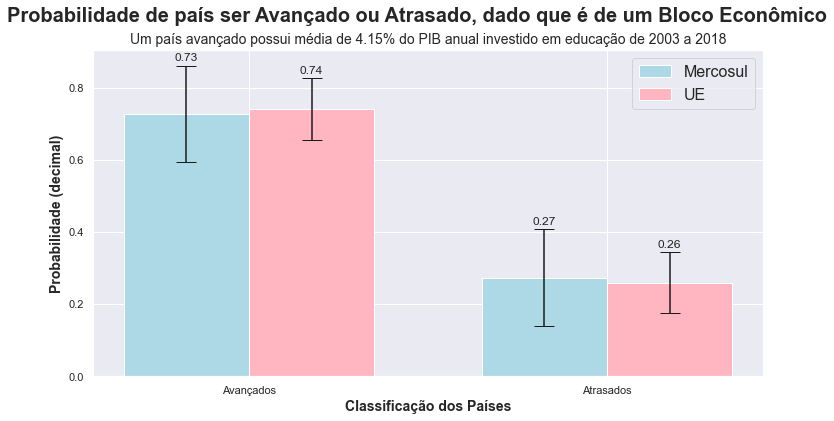

In [82]:
labels = ['Avançados', 'Atrasados']

sns.set_theme()

# Probabilidades dos Blocos
p_atrasado_dado_mercosul = 1 - p_avancado_dado_mercosul
p_atrasado_dado_eu = 1 - p_avancado_dado_eu

# Dados de ambos Blocos
dados_mercosul = [p_avancado_dado_mercosul, p_atrasado_dado_mercosul]
dados_eu = [p_avancado_dado_eu, p_atrasado_dado_eu]

x = np.arange(len(labels)) 
width = 0.35  

# Criando o Barplot, com intervalo baseado no erro padrão gerado pelo bootstrapping da etapa anterior
fig, ax = plt.subplots(figsize=(12, 6))
M_bar = ax.bar(x - width/2, dados_mercosul, width, label='Mercosul', yerr=[resM.standard_error, resM2.standard_error], capsize=10, color=("LightBlue"))
EU_bar = ax.bar(x + width/2, dados_eu, width, label='UE', yerr=[resEU.standard_error, resEU2.standard_error], capsize=10, color=("LightPink"))

# Customização da figura
ax.set_ylabel('Probabilidade (decimal)', fontsize=14, fontweight='bold')
ax.set_xlabel('Classificação dos Países', fontsize=14, fontweight='bold')
plt.suptitle('Probabilidade de país ser Avançado ou Atrasado, dado que é de um Bloco Econômico', fontsize=20, fontweight='bold')
plt.title('Um país avançado possui média de 4.15% do PIB anual investido em educação de 2003 a 2018', fontsize=14, fontweight='light')
ax.set_xticks(x, labels)
ax.legend(fontsize=16)

# Adicionando as probabilidades
ax.bar_label(M_bar, padding=3, fmt='%.2f')
ax.bar_label(EU_bar, padding=3, fmt='%.2f')

plt.show()